In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

#  Dataset Iris: Por Roberto Cholaky 

La parte siguiente del código irá dedicada a la obtención de los datos de entrenamiento y testeo. Se generará un arreglo de numpy que tenga todas las caracaterísticas de cada ejemplo en las filas. De este modo, si el arreglo es de M ejemplos y cada ejemplo tiene N características se tendrá que la matriz generada será de (M,N). Además para guardar los elementos de los labels en otro arregle de tamaño (M,C) donde C es la cantidad clases de clasificación (Esto ya que se utilizará one-hot-encoding), así cada fila en la matriz de características tendrá su label correspondiente.

In [122]:
#acá se define el nombre del archivo que se procede a trabajar:
file_name = 'iris.data'
#generamos listas para guardar los elementos del archivo de datos
labels = list()
data = list()
one_hot_classes = dict()
#Una vez llenas estas listas se procederá a pasar esta a un arreglo de numpy como se explicó en el apartado anterior:
# abrimos el archivo file_name:
with open(file_name) as file: 
    #procedemos a acceder a todas las filas del archivo:
    for line in file: 
        #dividimos el archivo por comas donde sabemos que el último elemento es el label
        splited_line = line.split(',')
        #Pasamos a checkear si el arreglo queda vacio o no:
        if splited_line != ['\n']:
            #Unimos las listas con los nuevos elementos
            # el elemento [-1] indica que se accede al último elemento del arreglo
            labels.append(splited_line[-1])
            #acá accedemos a todos los elementos salvo el último.
            data.append(splited_line[:-1])
            
#set de valores (valores sin repetir de la lista)
classification_set = set(labels)
n_C = len(classification_set)

# se genera un loop donde enumerate entrega los elementos contados {0,1,2} 
# y para cada elemento en el set de labels (que son solamente 3 valores) se genera un one-hot encoding
for index, value in enumerate(classification_set):
    zero = np.zeros((1, n_C))
    if index == 0:
        zero[:,index] = 1
        one_hot_classes[value]= zero 
    else:
        zero[:,index] = 1
        one_hot_classes[value]= zero

#Procedemos a calcular el one-hot encoding de todos los labels.:
for i, example in enumerate(labels):
    labels[i] = one_hot_classes[example]

#vstack es un método de la librería de numpy la que toma dos listas y las apila como filas. De este modo,
# si tenemos N filas de M elementos este nos entrega una función de (N,M).
data = np.vstack(data).astype('float64')
labels = np.vstack(labels)
#como el dataset viene ordenado es necesario desordenarlo para que los ejemplos no se encuentren todos juntos.
# de este modo, permutation de numpy permite entregar un arreglo de indices desordenados que permite que el arreglo quede
#desordenado.
permutation = np.random.permutation(data.shape[0])
data = data[permutation,:]
labels = labels[permutation]
#print the shape of data and labels:
print('feature data shape '+ str(data.shape))
print('labels of data shape ' + str(labels.shape))

feature data shape (150, 4)
labels of data shape (150, 3)


# Normalización de los datos: 
Es sabido que una manera de obtener un entrenamiento más rápido es mediante el uso de normalización de los datos de entrada, esto se debe a que datos normalizados permite que la región de optimización que se tiene sea más uniforme y por ende el método de descenso de gradiente sea más rápido debido a que los gradientes permiten un avance más directo hacia los mínimos. En los dos siguientes bloques de código se utilizan dos métodos conocidos de normalización, uno es el visto en clases y otro es uno enseñado en los cursos de coursera de deeplearning.ia.

# Método Número 1: 
normalización de datos mediante el uso de la media $\mu$ y la desviación estandard $\sigma$:
Este es la fórmula típica de normalización de datos en estadística que permite pasar los datos desde su distribución a una normal (0, 1) como los datos tienen en cada coordenada una distribución propia, se calcula la media  y desviación estandard entre los ejemplos de todas las coordenadas para después restarlos y usar para cada una de ellas la formula: 

$$Z_{i} = \frac{x_{i}-\mu}{\sigma^{2}}$$

Esto permite que los datos se agrupen cerca de $[-1, 1]$ con una probabilidad de 0.66. La gran diferencia con el otro método es que no asegura que el valor esté entre 0 y 1 sino que la mayoría de estos lo estarán.

In [123]:
mu_data = np.mean(data, axis= 0, keepdims = True)
std_data = np.std(data, axis = 0, keepdims = True)
print('shape de la media ' + str(mu_data.shape))
print('shape de la desviación estandard '+str(std_data.shape))
#data Normalization: 
data = (data-mu_data)/np.square(std_data)

shape de la media (1, 4)
shape de la desviación estandard (1, 4)


# Método Número 2: 
normalización de datos mediante el uso de máximos y mínimos:
Esta fue la forma de normalizar los datos vista en clases, que permite que los valores se encuentren entre el 0 y el 1.
Esto ya que divide la diferencia entre el dato actual y el valor más pequeño del arreglo (por cada coordenada) y luego este valor lo divide por la diferencia entre el máximo valor de dicha coordenada y el menor que sería la diferencia máxima que puede existir en el arreglo.

$$Z_{i} = \frac{x_{i}-min}{max - min}$$

In [62]:
data_max = np.max(data, axis=0)
data_min = np.min(data, axis=0)
data = (data-data_min)/(data_max-data_min)

#  Cross validation:
Es un métod de resampling el cual permite separar los datos en grupos donde uno de estos será utilizado para testear el entrenamiento de los datos. La idea se encuentra en que la composición del set de entrenamiento se puede variar con los distintos grupos y por ende se puede probar con distintos subgrupos de los datos.  Para esta tarea se dividió en 2 grupos donde uno contiene el 80% de los datos y el otro el 20% que son training y testing respectivamente.

In [63]:
#cross validation_set: generates training and test set with a 80% and 20% respectively from the dataset:
def cross_validation_set(X, Y): 
    #obtenemos el número de ejemplos
    M= X.shape[0]
    #permutamos los datos para que los grupos no sean siempre iguales si X e Y son los mismos
    permutation = np.random.permutation(M)
    #barajamos los sets de datos
    X_shuffled = X[permutation]
    Y_shuffled = Y[permutation]
    
    #sacamos el 80% para el training set y el 20% para el test set.
    # recordar que en numpy :fila son todos los elementos hast esa fila (sin ella incluida) 
    #y fila: es desde esa fila todos los elementos restantes
 
    train_limit = int(M*0.8)
    X_train = X_shuffled[:train_limit]
    Y_train = Y_shuffled[:train_limit]
    X_test = X_shuffled[train_limit:]
    Y_testing = Y_shuffled[train_limit:]
    return X_train, Y_train, X_test, Y_testing

X_train, Y_train, X_test, Y_testing = cross_validation_set(data, labels)
print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


In [303]:
#generación de funciones de activación : 
#función tanh
def tanh(X):
    #numpy exp permite aplicar la exponencial a todos los elementos de un arreglo. Se aplica punto a punto.
    exp = np.exp(X)
    exp_ = np.exp(-1*X)
    #la resta, suma y división de este tipo en numpy son elemento a elemento.
    tanh = (exp-exp_)/(exp+exp_)
    return tanh

#función de salida softmax: 
def softmax(X):
    exp = np.exp(X, dtype= np.float64)
    # se suman todos los elementos del vector por cada fila queda un vector de (ejemplos,)
    sum_exp = np.sum(exp, axis=1)
    #como queremos que sea de (ejemplos, 1) usamos la función expand_dims para obtener la dimensión faltante.
    sum_exp = np.expand_dims(sum_exp, -1)
    #este término se agrega ya que así la función softmax no sufrirá de indefinición (divisiones por cero)
    return exp/(sum_exp+0.002)

#función relu:
def relu(x):
    #la función np.where entrega una matriz donde si se cumple la condición x>0 el valor será el mismo x, sin x<0 entonces el
    #valor en la matriz será cero.
    return np.where(x>0, x, 0)

#funciones derivada de las funciones de activación:
#derivada de tanh:
def dtanh(x):
    return 1 - np.square(tanh(x))

#derivada de la función relu:
def drelu(x):
    #la función np.where entrega una matriz donde si se cumple la condición x>0 el valor será el mismo x, sin x<0 entonces el
    #valor en la matriz será cero.
    return np.where(x>=0, 1, 0)


# comienzo de la clase MLP: 

class MLP:
    def __init__(self, X, Y, n_layers, n_hidden_units, named_labels, activation='tanh'):
        #se genera el diccionario de elementos que utilizará la red neuronal:
        #pesos:
        W = dict()
        #bias
        b = dict()
        #derivadas de Z = WX+b
        dZ = dict()
        #derivadas de los pesos
        dW = dict()
        #derivada del bias
        db = dict()
        #los valores del forward A = f(Z)
        A_cache = dict()
        #los valores del forward de Z
        Z_cache = dict()
        
        # se guardan elementos como la función activación
        self.__activation__ = activation
        # los labels de las clases a clasificar (esto se usará en la matriz de confusión)
        self.named_labels = named_labels
        #el número de capas
        self.n_layers = n_layers
        #el learning rate se setea a un valor estandard en caso de que el usuario no lo indique
        self.learning_rate = 0.1
        
        #se empieza la generación de los pesos mediante la cantidad de elementos del vector X: 
        #queremos que si X es de (M, N) y la primera capa es de 10 elementos, W sea de (N, 10)
        first_shape = X.shape[1]
        #el número de hiddent units indicará la cantidad de neuronas de cada capa:
        second_shape = n_hidden_units
        for layer in range(n_layers):
            # el usuario puede elegir entre dos funciones de activación tanh o relu por lo que cada una generará activaciones 
            # diferentes ya que se ha probado que afecta el rendimiento de las redes:
            if activation == 'tanh':
                # guardamos el elemento en el diccionario
                #np.sqrt() es equivalente a la raiz cuadrada. 
                #np.random.rand entrega una matriz de forma (first_shape, second_shape) cuyos elemntos están entre 0 y 1
                W['W'+str(layer+1)] = (1/np.sqrt(second_shape))*np.random.rand(first_shape, second_shape)
            elif activation == 'relu':
                W['W'+str(layer+1)] = (1/np.sqrt(second_shape))*np.random.rand(first_shape, second_shape)
            else:
                raise Exception('Only tanh or relu activation functions work. Use those instead')
            #np.zeros genera un vector de ceros que tiene forma: (1,second_shape)
            b['b'+str(layer+1)] = np.zeros((1,second_shape))
            #se actualiza las dimensiones de la red.
            first_shape = second_shape
        #inicializamos la capa de salida: 
        W['W'+str(self.n_layers+1)] = (2/np.sqrt(second_shape))*np.random.rand(n_hidden_units, Y.shape[1])
        b['b'+str(self.n_layers+1)] = np.zeros((1, Y.shape[1]))
        #se genera el diccionario de parametros.
        self.parameters = dict()
        self.parameters['W'] = W
        self.parameters['b'] = b
        self.parameters['dZ'] = dZ
        self.parameters['dW'] = dW
        self.parameters['db'] = db
        self.parameters['A_cache'] = A_cache
        self.parameters['Z_cache'] = Z_cache
    
    def forwardPass(self, X, parameters):
        W = parameters['W']
        b = parameters['b']
        A_cache = dict()
        Z_cache = dict()
        In = X 
        #se guarda el input en el diccionario A: esto se usará en BP
        A_cache['A0']= X
        #se recorren las capas:
        for layer in range(self.n_layers):
            #se genera Z: Wx+b, donde np.dot calcula la multiplicación matricial 
            Z = np.dot(In, W['W'+str(layer+1)])+b['b'+str(layer+1)]
            #guardamos el Z en el diccionario, esto servirá para BP:
            Z_cache['Z'+str(layer+1)] = Z 
            #dependiendo de la activación que escogío el usuario se utiliza esa función de activación:
            #como ya en init revisabamos que self.activation fuese tanh o relu no es necesario hacerlo de nuevo: (raise exception)
            if self.__activation__ == 'tanh':
                A = tanh(Z)
            else:
                A = relu(Z)
            #se guarda A en el diccionario (util para BP)
            A_cache['A'+str(layer+1)] = A
            In = A
        # se calcula la capa de salida:
        Z = np.dot(In, W['W'+str(self.n_layers+1)])+b['b'+str(self.n_layers+1)]
        Z_cache['Z'+str(self.n_layers+1)] = Z 
        # se calcula la predicción de salida dado un input
        Y_pred = softmax(Z) 
        
        # se genera otro diccionario para no afectar el anterior y así poder agregar en un futuro el set de validación de ser 
        #necesario:
        model_parameters = dict()
        model_parameters['W'] = W
        model_parameters['b'] = b
        model_parameters['dW'] = parameters['dW']
        model_parameters['db'] = parameters['db']
        model_parameters['dZ'] = parameters['dZ']
        model_parameters['A_cache'] = A_cache
        model_parameters['Z_cache'] = Z_cache
        
        # el usuario puede elegir entre usar el diccionario de parámetros o no.
        return Y_pred, model_parameters 
    
    #para el loss se utilizó entropía cruzada:
    def Loss(self, Y_pred, Y_real):
        #se aplica el logaritmo de cada elemento de la predicción:
        #el término agregado es para que no hayan problemas con indefiniciones del logaritmo.
        log_Ypred = np.log(Y_pred+0.000002)
        #se hace la multiplicación de cada elemento por su label real:
        # el operador * en numpy es el operador multiplicación elemento a elemento
        Ylog_Ypred = -Y_real*log_Ypred
        #se calcula la suma de todos estos logaritmos por ejemplo por lo que queda el vector con forma (ejemplos,)
        L_i = np.sum(Ylog_Ypred, axis= 1)
        #se calcula el promedio de todos los ejemplos para obtener un único loss.
        loss = np.mean(L_i)
        return loss
        
    #funcion que dada una prediccion y un set de parametros permite realizar BP:    
    def backPropagation(self, Y_pred, Y, parameters):
        W = parameters['W']  
        A_cache = parameters['A_cache']
        Z_cache = parameters['Z_cache']
        dZ = parameters['dZ']
        dW = parameters['dW'] 
        db = parameters['db']
        #se guarda el número de ejemplos:
        M = Y.shape[0]
        #Dz es de forma (M, C) donde M es el numero de ejemplos y C el número de clases:
        dZ['Z'+str(self.n_layers+1)] = (Y_pred - Y)
        # DW para la última capa tiene forma (n_[l-1], C) donde n_[l-1] es la cantidad de unidades ocultas de la capa l-1 
        #y C el numero de clases: 
        #multiplicamos A.T (el traspuesto de A) por dZ para obtener una forma (n_[l-1], M)X(M, C)= (n_[l-1], C).
        dW['W'+str(self.n_layers+1)] = np.dot(A_cache['A'+str(self.n_layers)].T, dZ['Z'+str(self.n_layers+1)])
        #el parametro keepdims permite que al salida sea de forma (n, 1) donde si no se usa sería de forma (n,)
        db['b'+str(self.n_layers+1)] = (1/M)*np.sum(dZ['Z'+str(self.n_layers+1)], axis=0, keepdims=True)
        #corremos el BP por todas las capas:
        for layer in range(self.n_layers, 0, -1):
            #como dZ[l] es de forma (M, n_[l]) y W[l] es de forma (n_[l-1], n_l[l]) dZ[l]xW.T devuelve las dimensiones correctas
            #porque dZ[l-1] es de la forma (M, n[l-1])
            if self.__activation__ == 'tanh':
                dZ['Z'+str(layer)] = np.dot(dZ['Z'+str(layer+1)], W['W'+str(layer+1)].T)*dtanh(Z_cache['Z'+str(layer)])
            else:
                dZ['Z'+str(layer)] = np.dot(dZ['Z'+str(layer+1)], W['W'+str(layer+1)].T)*drelu(Z_cache['Z'+str(layer)])
            # DW para la capa l-esima tiene forma (n_[l-1], n_[l]) entonces multiplicamos A.T por dZ 
            #en cuyo caso tenemos (n_[l-1], M)X(M, n_[l])= (n_[l-1], C): 
            dW['W'+str(layer)] = (1/M)*np.dot(A_cache['A'+str(layer-1)].T, dZ['Z'+str(layer)])
            db['b'+str(layer)] = (1/M)*np.sum(dZ['Z' + str(layer)], axis=0, keepdims=True)
        #guardamos los parametros:    
        parameters['dZ'] = dZ
        parameters['dW'] = dW
        parameters['db'] = db
        #actualizamos los pesos antes de devolverlos
        parameters = self.update_parameters(parameters)
        return parameters
        
    
    # función que permite actualiza pesos dado un diccionario de derivadas:
    def update_parameters(self, parameters):
        W = parameters['W']
        b = parameters['b']
        dW = parameters['dW'] 
        db = parameters['db']
        for layer in range(1, self.n_layers+1, 1):
            #aplicamos gradiente descendiente:
            W['W'+str(layer+1)] = W['W'+str(layer+1)]-self.learning_rate*dW['W'+str(layer+1)]
            b['b'+str(layer+1)] = b['b'+str(layer+1)]-self.learning_rate*db['b'+str(layer+1)]
        parameters['W'] = W
        parameters['b'] = b
        self.parameters
        return parameters
        
    
    #funcion que permite el cálculo de accuracy: 
    def calc_accuracy(self, Y_pred, Y):
        #expandimos la última dimensión para que tengan forma (n, 1) para cualquier n.
        #recordemos que el término -1 hace referencia al último elemento.
        pred = np.expand_dims(np.argmax(Y_pred, axis=-1), -1)
        real = np.expand_dims(np.argmax(Y, axis=-1),-1)
        #el operador == en numpy hace que el vector resultante sea de (true o false), donde si sumamos todos los true ( o 1)
        # obtenemos la cantidad de veces que se calculó correctamente el resultado:
        acc = np.sum((pred==real))/Y.shape[0]
        return acc
    
    #función predecir: predice dado un input y sus parámetros la clase del input
    def predict(self, X, parameters):
        W = parameters['W']
        b = parameters['b']
        In = X 
        for layer in range(self.n_layers):
            Z = np.dot(In, W['W'+str(layer+1)])+b['b'+str(layer+1)]
            if self.__activation__ == 'tanh':
                A = tanh(Z)
            elif self.__activation__ == 'relu':
                A = relu(Z)
            In = A
        Z = np.dot(In, W['W'+str(self.n_layers+1)])+b['b'+str(self.n_layers+1)]
        Y_pred = softmax(Z) 
        return Y_pred
    #función que calcula la matriz de confusión:        
    def confusion_matrix(self, Y_pred, Y):
        # se utiliza np.argmax para obtener el indice de mayor valor en la salida de la función softmax
        # np.expand dims expande la última dimensión para obtener un vector de (n,1)
        real_labels = np.expand_dims(np.argmax(Y, axis=-1),-1)
        pred_labels = np.expand_dims(np.argmax(Y_pred, axis=-1), -1)
        #con los nombres de los labels crearemos la matriz de confuisón
        N_labels = len(self.named_labels)
        #generamos una matriz llena de ceros que iremos llenando
        conf_M = np.zeros((N_labels, N_labels))
        for example in range(real_labels.shape[0]):
            #recorremos todos los ejemplos
            #obtenemos los indices calculados anteriormente
            row = real_labels[example]
            column = pred_labels[example]
            #le sumamos uno a la posición. Recordemos que si row == column entonces la predicción es correcta
            conf_M[row, column] += 1
        #utilizamos un frame de pandas para poner filas y columnas con nombre de las clases de clasificación.
        conf_M = pd.DataFrame(conf_M, self.named_labels, self.named_labels)
        return conf_M
        
    #acá se genera el entrenamiento, la función genera los training y test set sola mediante cross-validation:
    def train(self, X, Y, Epochs, learning_rate):
        #obtenemos los parámetros
        parameters = self.parameters
        #generamos listas para los loss y accuracy:
        training_loss = list()
        training_accuracy = list()
        
        #se define el learning rate:
        self.learning_rate= learning_rate
        #se separa la data
        X_train, Y_train, X_test, Y_test = cross_validation_set(X, Y)
        
        #iteraremos el entrenamiento por le número de epocas:
        for epoch in range(1, Epochs+1):
            #se genera la predicción y se obtienen los parametros (Z_cache, A_cache)
            Y_pred, parameters = self.forwardPass(X_train, parameters)
            
            #se calcula el error:
            train_loss = self.Loss(Y_pred, Y_train)
            
            #se calcula el accuracy:
            train_acc = self.calc_accuracy(Y_pred, Y_train)
            
            #se agregan a las listas:
            training_loss.append(train_loss)
            training_accuracy.append(train_acc)
            
            #cada 5 epocas se printeará el valor loss y accuracy
            if epoch%5==0:
                print('Epoch {N_epoch} is train loss: {loss}, train accuracy: {accuracy}'.format(N_epoch=epoch, loss=train_loss,\
                                                                                                            accuracy= train_acc))
            #se actualizan los pesos    
            parameters = self.backPropagation(Y_pred, Y_train, parameters)
            
        
        #se predice una salida:
        Y_pred_test = self.predict(X_test, parameters)
        #se calcula su loss:
        testing_loss = self.Loss(Y_pred_test, Y_test)
        
        #y su accuracy:
        testing_accuracy = self.calc_accuracy(Y_pred_test, Y_test) 
        
        #se printean los resultados de entrenamiento como el loss medio y el accuracy final de entrenamiento
        #junto con el loss de testeo y el accuracy de testeo
        print('Trainig is done:')
        print('the training loss is {loss} and the training accuracy is {acc}'.format(loss = np.mean(training_loss), acc=train_acc))
        print('the testing loss is {loss} and the testing accuracy is {acc}'.format(loss = testing_loss, acc= testing_accuracy))
        
        #se grafica el costo por epoch
        fig, ax = plt.subplots()
        train = ax.plot(range(1, Epochs+1), training_loss, '-b', label='training loss')
        ax.set_title('models loss with {epochs} epochs of training'.format(epochs=Epochs))
        ax.set_xlabel('Epochs')
        ax.set_ylabel('loss')
        ax.set_ylim([0,5])
        plt.show()
        
        # se grafica el accuracy por epoch
        fig, ax = plt.subplots()
        train = ax.plot(range(1, Epochs+1), training_accuracy, '-b', label='training accuracy')
        ax.set_title('models accuracy with {epochs} epochs of training'.format(epochs=Epochs))
        ax.set_xlabel('Epochs')
        ax.set_ylabel('accuracy')
        ax.set_ylim([0,1])
        plt.show()
        plt.show()
        print('plot of the confusion matrix, where the rows represent the real data and the columns the predicted data:')
        
        #se devuelve la matriz de confusión:
        cM = self.confusion_matrix(Y_test, Y_pred_test)
        print(cM)
            

# Se prueba la primera estructura: una red de 4 capas ocultas, 10 unidades por capa:

In [304]:
named_classes = list(classification_set)
myMlp = MLP(data, labels, n_layers = 4, n_hidden_units=10, named_labels=named_classes)

se entrena por 700 epochs con un learning rate de 0.02:

Epoch 5 is train loss: 1.273300675240498, train accuracy: 0.5083333333333333
Epoch 10 is train loss: 1.3602136887246261, train accuracy: 0.55
Epoch 15 is train loss: 1.2822150854889178, train accuracy: 0.49166666666666664
Epoch 20 is train loss: 1.2439395301540865, train accuracy: 0.5416666666666666
Epoch 25 is train loss: 1.1751058516923718, train accuracy: 0.5
Epoch 30 is train loss: 1.1418087840507676, train accuracy: 0.5416666666666666
Epoch 35 is train loss: 1.0928244384697383, train accuracy: 0.5
Epoch 40 is train loss: 1.0641332138904518, train accuracy: 0.5416666666666666
Epoch 45 is train loss: 1.0302509276628602, train accuracy: 0.5
Epoch 50 is train loss: 1.007971851562837, train accuracy: 0.5416666666666666
Epoch 55 is train loss: 0.9846677271897697, train accuracy: 0.49166666666666664
Epoch 60 is train loss: 0.9684317721667043, train accuracy: 0.5416666666666666
Epoch 65 is train loss: 0.9523089832205326, train accuracy: 0.49166666666666664
Epoch 70 is train loss: 0.940754

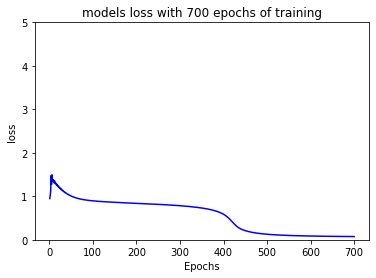

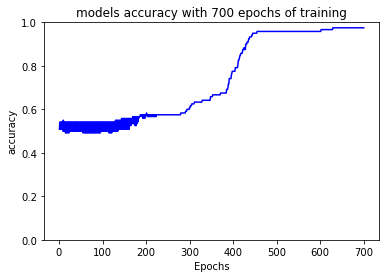

plot of the confusion matrix, where the rows represent the real data and the columns the predicted data:
                   Iris-versicolor\n  Iris-setosa\n  Iris-virginica\n
Iris-versicolor\n               12.0            0.0               2.0
Iris-setosa\n                    0.0            8.0               0.0
Iris-virginica\n                 0.0            0.0               8.0


In [305]:
myMlp.train(data, labels, 700, 0.02)

# Se prueba la segunda estructura: una red de 5 capas ocultas, 7 unidades por capa:
Esta red se entrena con 700 epochs y 0.02 de learning rate:

In [318]:
myMlp2 = MLP(data, labels, n_layers = 3, n_hidden_units=15, named_labels=named_classes, activation='relu')

Epoch 5 is train loss: 2.331942373399816, train accuracy: 0.5333333333333333
Epoch 10 is train loss: 1.089495090049982, train accuracy: 0.5166666666666667
Epoch 15 is train loss: 0.9308587843234728, train accuracy: 0.49166666666666664
Epoch 20 is train loss: 0.9082054123782721, train accuracy: 0.49166666666666664
Epoch 25 is train loss: 0.8996587058338935, train accuracy: 0.5
Epoch 30 is train loss: 0.8930862283360298, train accuracy: 0.5083333333333333
Epoch 35 is train loss: 0.8874126705275757, train accuracy: 0.5083333333333333
Epoch 40 is train loss: 0.8823906874624204, train accuracy: 0.5083333333333333
Epoch 45 is train loss: 0.8777875129704223, train accuracy: 0.5083333333333333
Epoch 50 is train loss: 0.8734372434943665, train accuracy: 0.5083333333333333
Epoch 55 is train loss: 0.8695442181112415, train accuracy: 0.5083333333333333
Epoch 60 is train loss: 0.8659355889412409, train accuracy: 0.5083333333333333
Epoch 65 is train loss: 0.8626031414229764, train accuracy: 0.508333

Epoch 545 is train loss: 0.43508942893403807, train accuracy: 0.8166666666666667
Epoch 550 is train loss: 0.43233817441980676, train accuracy: 0.8416666666666667
Epoch 555 is train loss: 0.4301922559790635, train accuracy: 0.8166666666666667
Epoch 560 is train loss: 0.4275715570578612, train accuracy: 0.8333333333333334
Epoch 565 is train loss: 0.4246977958746927, train accuracy: 0.8166666666666667
Epoch 570 is train loss: 0.42224275829748176, train accuracy: 0.825
Epoch 575 is train loss: 0.41885768222989384, train accuracy: 0.85
Epoch 580 is train loss: 0.4172159643019132, train accuracy: 0.825
Epoch 585 is train loss: 0.41410063194311847, train accuracy: 0.85
Epoch 590 is train loss: 0.4127065259070097, train accuracy: 0.825
Epoch 595 is train loss: 0.4126202827818942, train accuracy: 0.8083333333333333
Epoch 600 is train loss: 0.40709245886915185, train accuracy: 0.8416666666666667
Epoch 605 is train loss: 0.40695822851339564, train accuracy: 0.8166666666666667
Epoch 610 is train l

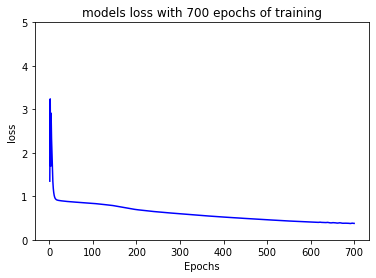

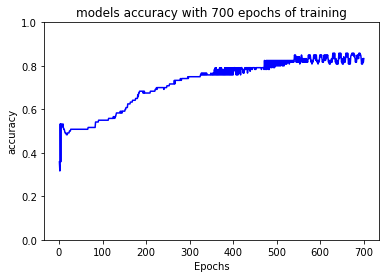

plot of the confusion matrix, where the rows represent the real data and the columns the predicted data:
                   Iris-versicolor\n  Iris-setosa\n  Iris-virginica\n
Iris-versicolor\n                6.0            0.0               0.0
Iris-setosa\n                    1.0           11.0               1.0
Iris-virginica\n                 0.0            0.0              11.0


In [319]:
myMlp2.train(data, labels, 700, 0.04)

# Prueba con otro dataset:
se hará la prueba con el dataset seeds entregado en la tarea

# Se cargan los datos:

In [16]:
#acá se define el nombre del archivo que se procede a trabajar:
file_name = 'seeds_dataset.txt'
#generamos listas para guardar los elementos del archivo de datos
labels = list()
data = list()
one_hot_classes = dict()
#Una vez llenas estas listas se procederá a pasar esta a un arreglo de numpy como se explicó en el apartado anterior:
# abrimos el archivo file_name:
with open(file_name) as file: 
    #procedemos a acceder a todas las filas del archivo:
    for line in file: 
        #dividimos el archivo por comas donde sabemos que el último elemento es el label
        splited_line = line.split()
        #Pasamos a checkear si el arreglo queda vacio o no:
        if splited_line != ['\n']:
            #Unimos las listas con los nuevos elementos
            # el elemento [-1] indica que se accede al último elemento del arreglo
            labels.append(splited_line[-1])
            #acá accedemos a todos los elementos salvo el último.
            data.append(splited_line[:-1])
            
#set de valores (valores sin repetir de la lista)
classification_set = set(labels)
n_C = len(classification_set)

# se genera un loop donde enumerate entrega los elementos contados {0,1,2} 
# y para cada elemento en el set de labels (que son solamente 3 valores) se genera un one-hot encoding
for index, value in enumerate(classification_set):
    zero = np.zeros((1, n_C))
    if index == 0:
        zero[:,index] = 1
        one_hot_classes[value]= zero 
    else:
        zero[:,index] = 1
        one_hot_classes[value]= zero

#Procedemos a calcular el one-hot encoding de todos los labels.:
for i, example in enumerate(labels):
    labels[i] = one_hot_classes[example]

#vstack es un método de la librería de numpy la que toma dos listas y las apila como filas. De este modo,
# si tenemos N filas de M elementos este nos entrega una función de (N,M).
data = np.vstack(data).astype('float64')
labels = np.vstack(labels)
#como el dataset viene ordenado es necesario desordenarlo para que los ejemplos no se encuentren todos juntos.
# de este modo, permutation de numpy permite entregar un arreglo de indices desordenados que permite que el arreglo quede
#desordenado.
permutation = np.random.permutation(data.shape[0])
data2 = data[permutation,:]
labels2 = labels[permutation]
#print the shape of data and labels:
print('feature data shape '+ str(data.shape))
print('labels of data shape ' + str(labels.shape))

data_max = np.max(data2, axis=0)
data_min = np.min(data2, axis=0)
data2 = (data2-data_min)/(data_max-data_min)

feature data shape (210, 7)
labels of data shape (210, 3)


# Se genera una red con 3 capas ocultas de 20 unidades cada una

In [17]:
myMlp3 = MLP(data2, labels2, n_layers = 4, n_hidden_units=20, named_labels=classification_set, activation='tanh')

Epoch 5 is train loss: 5.338312762036959, train accuracy: 0.3333333333333333
Epoch 10 is train loss: 6.441188765923265, train accuracy: 0.36904761904761907
Epoch 15 is train loss: 4.252421990223499, train accuracy: 0.2976190476190476
Epoch 20 is train loss: 8.544314779460706, train accuracy: 0.3333333333333333
Epoch 25 is train loss: 6.465779010955952, train accuracy: 0.36904761904761907
Epoch 30 is train loss: 4.961600745744508, train accuracy: 0.2976190476190476
Epoch 35 is train loss: 8.485743361146595, train accuracy: 0.3333333333333333
Epoch 40 is train loss: 5.313903211865532, train accuracy: 0.36904761904761907
Epoch 45 is train loss: 4.1727211274923555, train accuracy: 0.2976190476190476
Epoch 50 is train loss: 4.328113746631579, train accuracy: 0.3333333333333333
Epoch 55 is train loss: 2.1551880240701684, train accuracy: 0.36904761904761907
Epoch 60 is train loss: 1.3451352848408706, train accuracy: 0.43452380952380953
Epoch 65 is train loss: 1.296555469799593, train accuracy

Epoch 555 is train loss: 0.42388477926610096, train accuracy: 0.8273809523809523
Epoch 560 is train loss: 0.4237499317046846, train accuracy: 0.8273809523809523
Epoch 565 is train loss: 0.42361630865100386, train accuracy: 0.8273809523809523
Epoch 570 is train loss: 0.4234838557990964, train accuracy: 0.8273809523809523
Epoch 575 is train loss: 0.4233525213894903, train accuracy: 0.8273809523809523
Epoch 580 is train loss: 0.4232222560745503, train accuracy: 0.8273809523809523
Epoch 585 is train loss: 0.4230930127917941, train accuracy: 0.8273809523809523
Epoch 590 is train loss: 0.4229647466446507, train accuracy: 0.8273809523809523
Epoch 595 is train loss: 0.4228374147901697, train accuracy: 0.8273809523809523
Epoch 600 is train loss: 0.4227109763332283, train accuracy: 0.8273809523809523
Epoch 605 is train loss: 0.4225853922268157, train accuracy: 0.8273809523809523
Epoch 610 is train loss: 0.4224606251780044, train accuracy: 0.8273809523809523
Epoch 615 is train loss: 0.42233663955

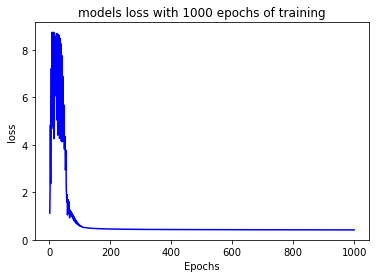

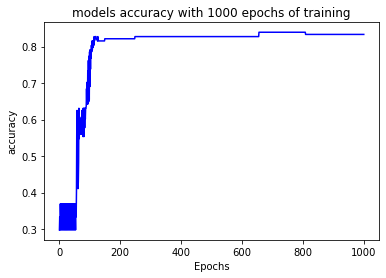

plot of the confusion matrix, where the rows represent the real data and the columns the predicted data:
      2     1    3
2  19.0   0.0  0.0
1   1.0  12.0  2.0
3   0.0   2.0  6.0


In [18]:
myMlp3.train(data2, labels2, 1000, 0.01)